In [7]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from sklearn import *
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
import unicodedata 
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm
from nltk.corpus import wordnet as wn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
#import data 

df = pd.read_csv("train.tsv",sep='\t' , encoding='utf-8' )

df.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns


df.shape

(156060, 2)

All frequencies, including STOPWORDS:
     Word  Frequency
0     the      51220
1       ,      42006
2       a      36123
3      of      32308
4     and      31763
5      to      22448
6       .      17865
7      's      16971
8      in      13745
9      is      13447
10   that      12327
11     it      11677
12     as       8623
13   with       7750
14    for       7417
15    its       7051
16   film       6689
17     an       6479
18  movie       5905
19   this       5677
20    but       5126
21     be       4977
22    you       4827
23     on       4730
24    n't       3970
25     by       3918
26   more       3888
27    his       3827
28  about       3682
29    one       3609


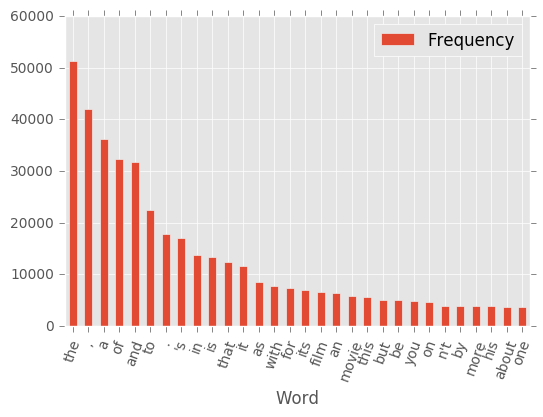

In [4]:
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

top_N = 30
print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

rslt.plot.bar(rot=70)
plt.show()

In [5]:
#number of tokens in the corpus
txt = df.Phrase.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordss = nltk.tokenize.word_tokenize(txt)
len(wordss)

1124613

In [8]:
#number of stop words
stop = stopwords.words('english')
a = []
for w in wordss:

    if w in stop:
        a.append(w)
len(a)
        

414060

In [9]:
#number of english words
import enchant
b = []
d = enchant.Dict("en_US")
for word in wordss:
    if d.check(word):
        b.append(word)


c = []
for w in b:

    if w not in stop:
        c.append(w)
len(c)


581190

In [10]:
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

a_chars =  count(wordss, string.ascii_letters)
a_punct = count(wordss, string.punctuation)

print a_chars
print a_punct

40467
67553


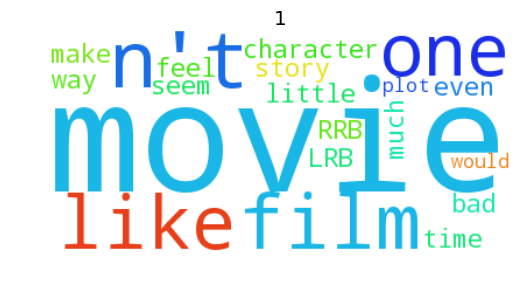

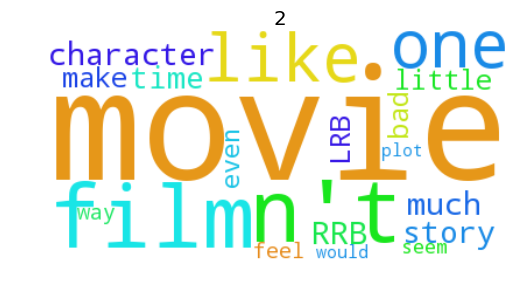

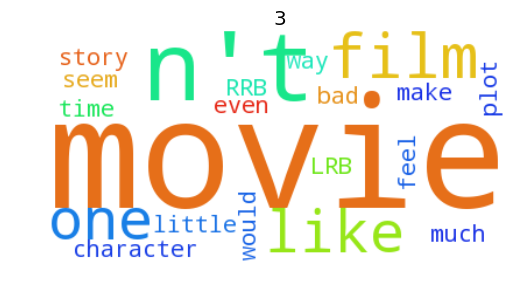

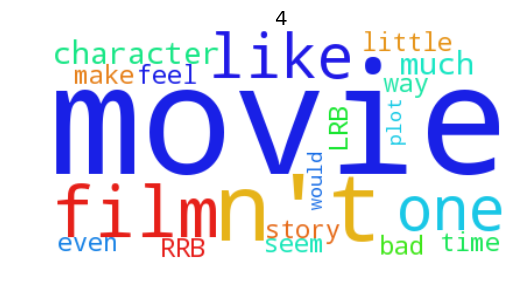

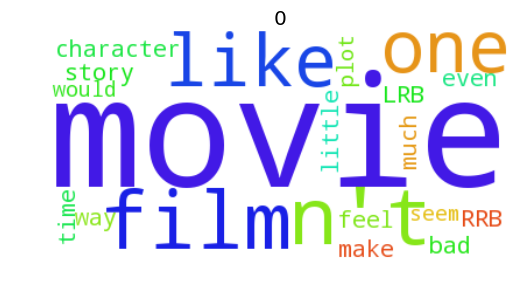

In [11]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
range = [1,2,3,4,0]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))
for i in range: 
    positive_cloud = cloud.generate(df.loc[df.Sentiment == 1, 'Phrase'].str.cat(sep='\n'))
    plt.figure()
    plt.imshow(positive_cloud)
    plt.axis("off")
    plt.title(i)
    plt.show()